    Time   Actual consumption[MWh]  Forecasted consumption[MWh]
0       0                    11039                        10968
1       1                    10507                        10597
2       2                    10182                        10273
3       3                     9990                        10263
4       4                     9923                        10297
5       5                     9997                        10383
6       6                    10295                        10514
7       7                    10754                        10965
8       8                    11582                        11933
9       9                    12358                        13031
10     10                    13051                        13735
11     11                    13251                        14103
12     12                    13592                        14224
13     13                    13215                        13967
14     14                    12886      

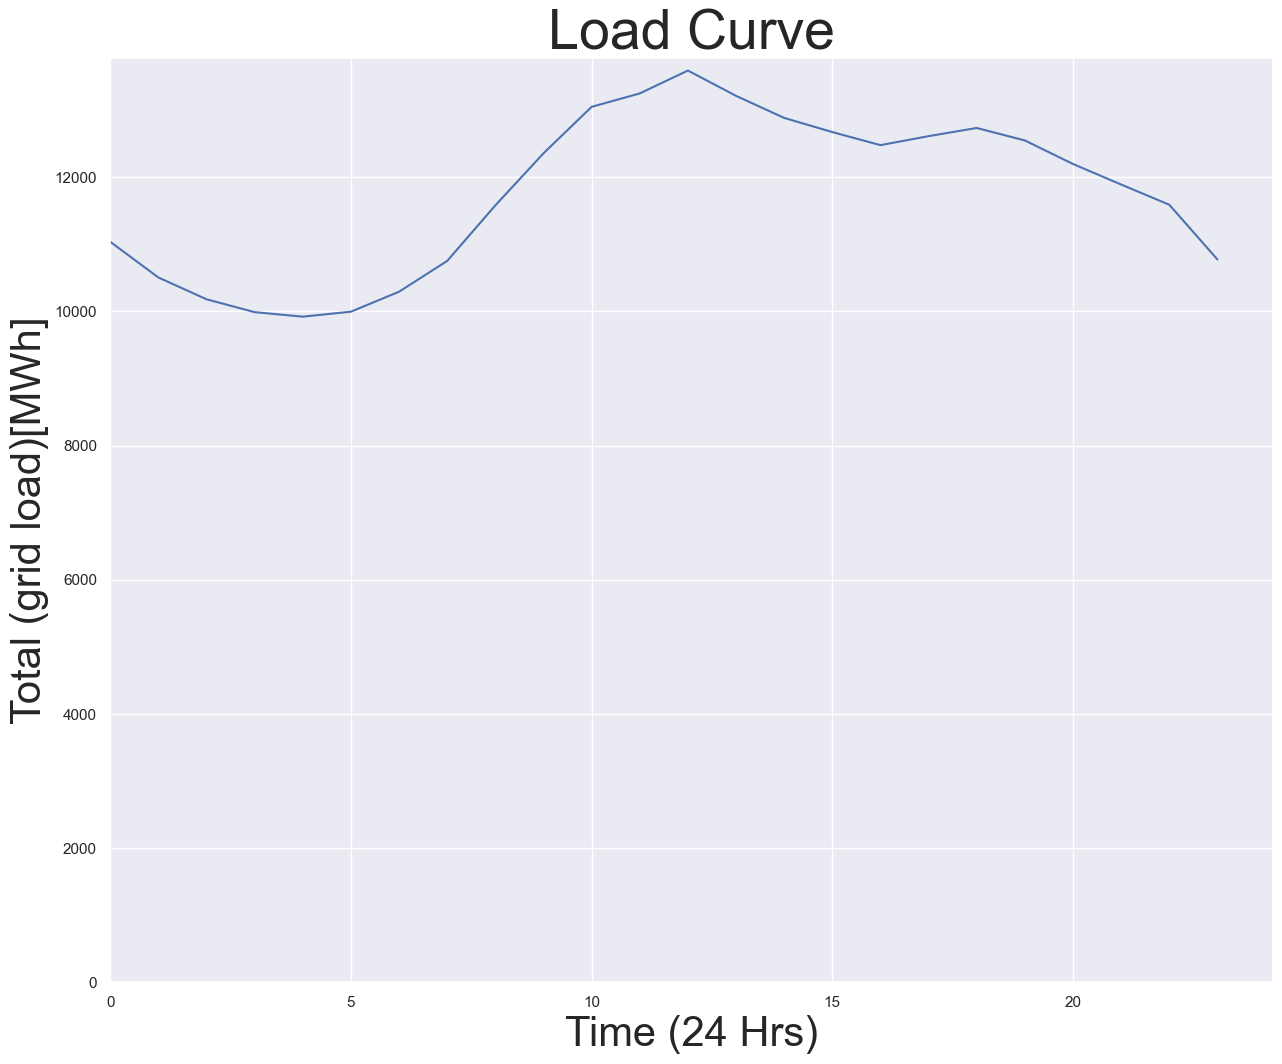

    Time  Total (grid load)[MWh]  interval
0    0.0                   11039         1
1    1.0                   10507         1
2    2.0                   10182         1
3    3.0                    9990         1
4    4.0                    9923         1
5    5.0                    9997         1
6    6.0                   10295         1
7    7.0                   10754         1
8    8.0                   11582         1
9    9.0                   12358         1
10  10.0                   13051         1
11  11.0                   13251         1
12  12.0                   13592         1
13  13.0                   13215         1
14  14.0                   12886         1
15  15.0                   12675         1
16  16.0                   12480         1
17  17.0                   12614         1
18  18.0                   12736         1
19  19.0                   12550         1
20  20.0                   12199         1
21  21.0                   11893         1
22  22.0   

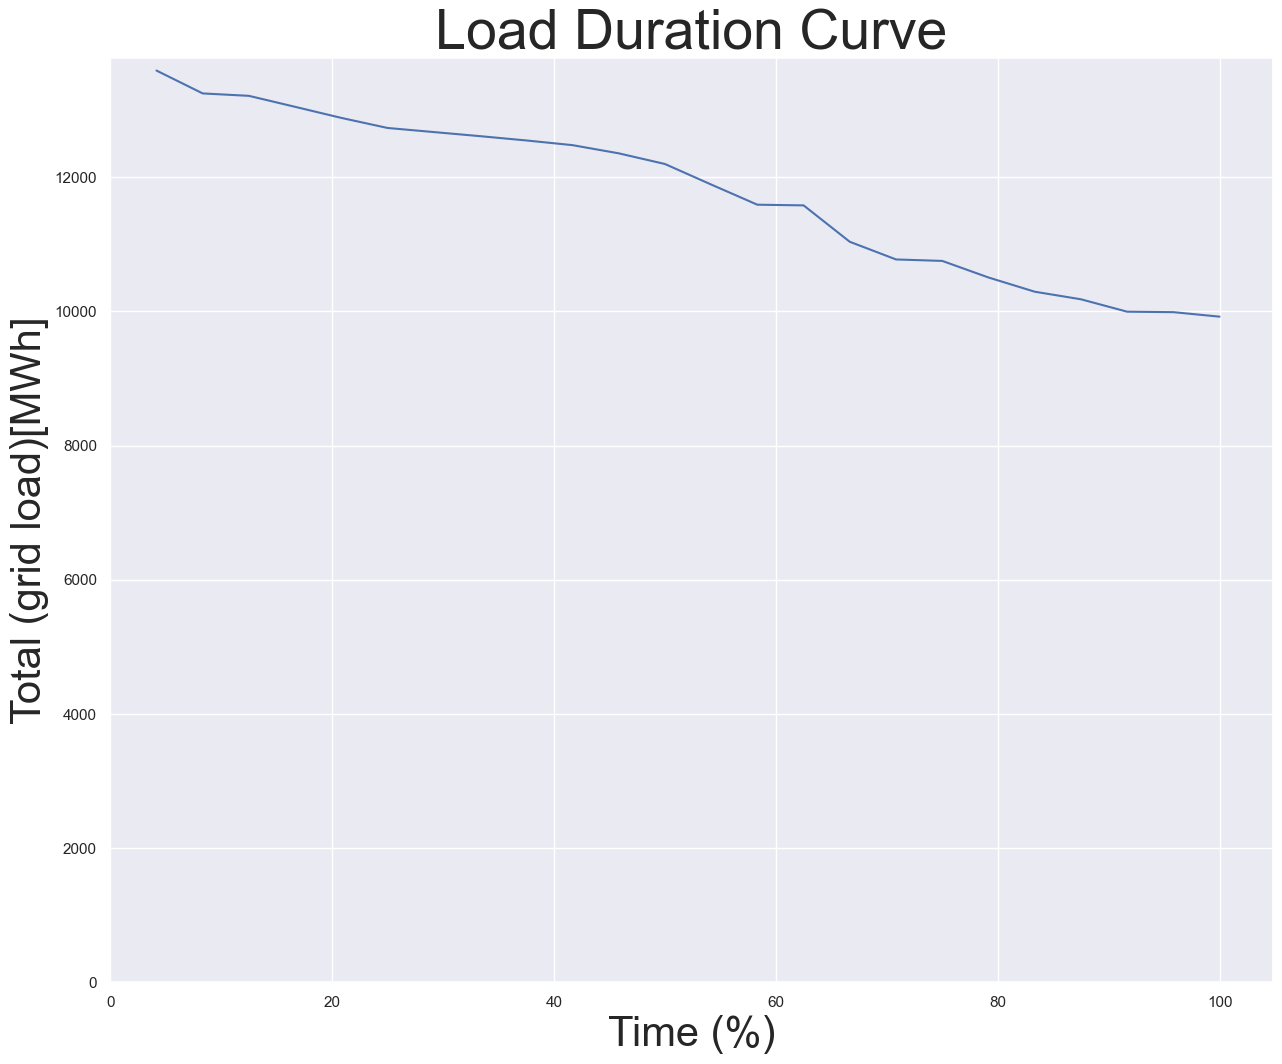

The total energy consumed[MWh]=  270379.5
The Capacity factor =  0.8288561286050617
Peak to minimum ratio -  1.369747052302731
Peak to mean ratio -  1.1562042553794787


In [13]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

load_df= pd.read_excel(r'C:\\lab1.xlsx',sheet_name='Data')
print(load_df)

data_load = {'Time':[00.00 ,1.00 ,2.00 ,3.00 ,4.00 ,5.00 ,6.00 ,7.00 ,8.00 ,9.00 ,10.00 ,11.00 ,12.00 ,13.00 ,14.00 ,15.00 ,16.00 ,17.00 ,18.00 ,19.00 ,20.00 ,21.00 ,22.00 ,23.00],
'Total (grid load)[MWh]':[11039,10507,10182,9990,9923,9997,10295,10754,11582,12358,13051,13251,13592,13215,12886,12675,12480,12614,12736,12550,12199,11893,11592,10776]}

print(data_load)

load_table= pd.DataFrame(data_load)
print(load_table)

sb.set(rc={"figure.figsize":(15,12)})
plot=sb.lineplot(x = "Time", y = "Total (grid load)[MWh]", data = load_table)
plt.xlim (0, None)
plt.ylim (0, None)
plot.set_title("Load Curve", fontsize = 40)
plot.set_xlabel("Time (24 Hrs)", fontsize = 30)
plot.set_ylabel("Total (grid load)[MWh]", fontsize = 30)
plt.show()

load_table['interval'] = 1
print(load_table)
load_table_sorted = load_table.sort_values( by=['Total (grid load)[MWh]'], ascending = False )
print(load_table_sorted)
load_table_sorted['duration'] = load_table_sorted['interval'].cumsum()
print(load_table_sorted)
load_table_sorted['percentage'] = load_table_sorted['duration']*100/24
print(load_table_sorted)

plot=sb.lineplot(x = "percentage", y = "Total (grid load)[MWh]", data = load_table_sorted)
plt.xlim (0, None)
plt.ylim (0, None)
plot.set_title("Load Duration Curve", fontsize = 40)
plot.set_xlabel("Time (%)", fontsize = 30)
plot.set_ylabel("Total (grid load)[MWh]", fontsize = 30)
plt.show()

s=0.0
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y = [13592,13251,13215,13051,12886,12736,12675,12614,12550,12480,12358,12199,11893,11592,11582,11039,10776,10754,10507,10295,10182,9997,9990,9923]
for k in range(len(x) - 1):
    s += (x[k+1] - x[k]) * (y[k+1] + y[k]) / 2
print("The total energy consumed[MWh]= ", s )
CF = s / (max(y)*24)
print("The Capacity factor = " , CF )
Peak = max(y)
Minimum = min(y)
mean = sum(y)/ len(y)
print("Peak to minimum ratio - " , max(y)/min(y))
print("Peak to mean ratio - " , Peak/mean)
